In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
layoffs_df = pd.read_csv("/content/layoffs.csv")

In [3]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,UKG,Boston,HR,2200.0,0.14,2024-07-03,Unknown,United States,NaN
1,OpenText,Waterloo,Data,1200.0,0.02,2024-07-03,Post-IPO,Canada,1100.0
2,Unacademy,Bengaluru,Education,250.0,NaN,2024-07-02,Series H,India,838.0
3,Koo,Bengaluru,Consumer,NaN,1.00,2024-07-02,Unknown,India,51.0
4,Lightricks,Jerusalem,Consumer,70.0,0.12,2024-07-01,Series D,Israel,335.0


In [4]:
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3693 non-null   object 
 1   location             3692 non-null   object 
 2   industry             3692 non-null   object 
 3   total_laid_off       2423 non-null   float64
 4   percentage_laid_off  2373 non-null   float64
 5   date                 3693 non-null   object 
 6   stage                3686 non-null   object 
 7   country              3693 non-null   object 
 8   funds_raised         3297 non-null   float64
dtypes: float64(3), object(6)
memory usage: 259.8+ KB


In [5]:
layoffs_df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2423.000000,2373.000000,3297.000000
mean,259.876187,0.282553,798.262358
std,828.069041,0.288863,4729.482859
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,52.000000
50%,80.000000,0.170000,167.000000
75%,188.000000,0.300000,472.000000
max,14000.000000,1.000000,121900.000000


In [6]:
print(layoffs_df.isnull().sum())

company                   0
location                  1
industry                  1
total_laid_off         1270
percentage_laid_off    1320
date                      0
stage                     7
country                   0
funds_raised            396
dtype: int64


In [7]:
# Handling missing values
layoffs_df['location'].fillna('Unknown', inplace=True)
layoffs_df['industry'].fillna('Unknown', inplace=True)
layoffs_df['total_laid_off'].fillna(0, inplace=True)
layoffs_df['percentage_laid_off'].fillna(0, inplace=True)
layoffs_df['stage'].fillna('Unknown', inplace=True)
layoffs_df['funds_raised'].fillna(0, inplace=True)

In [8]:
# Convert 'date' to datetime
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])

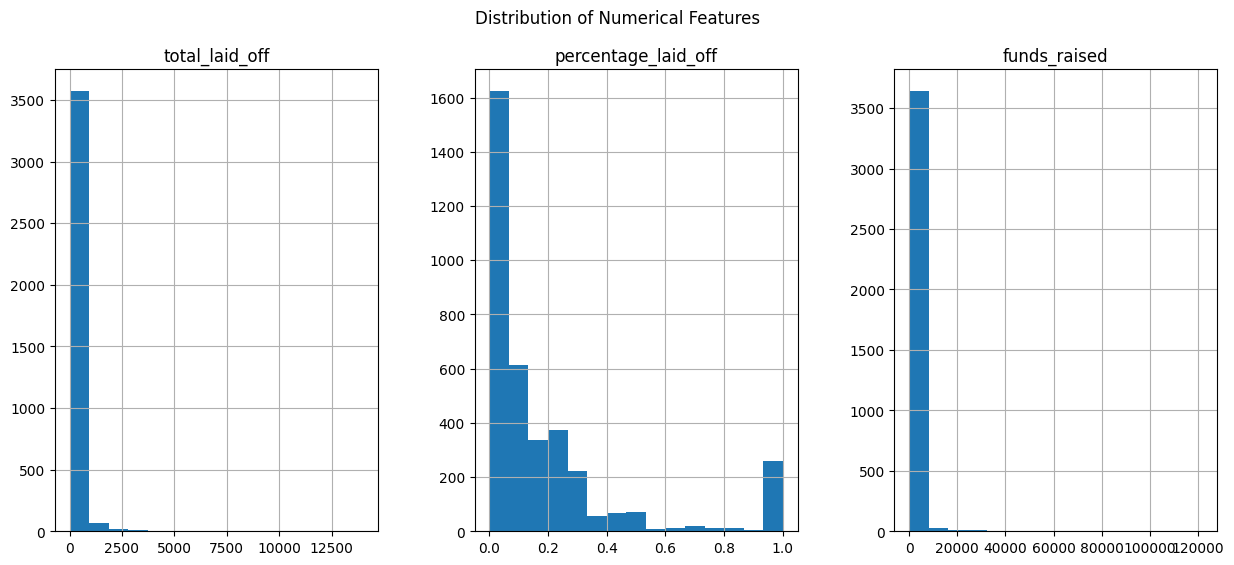

In [9]:
# Distribution of numerical features
numerical_features = ['total_laid_off', 'percentage_laid_off', 'funds_raised']
layoffs_df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

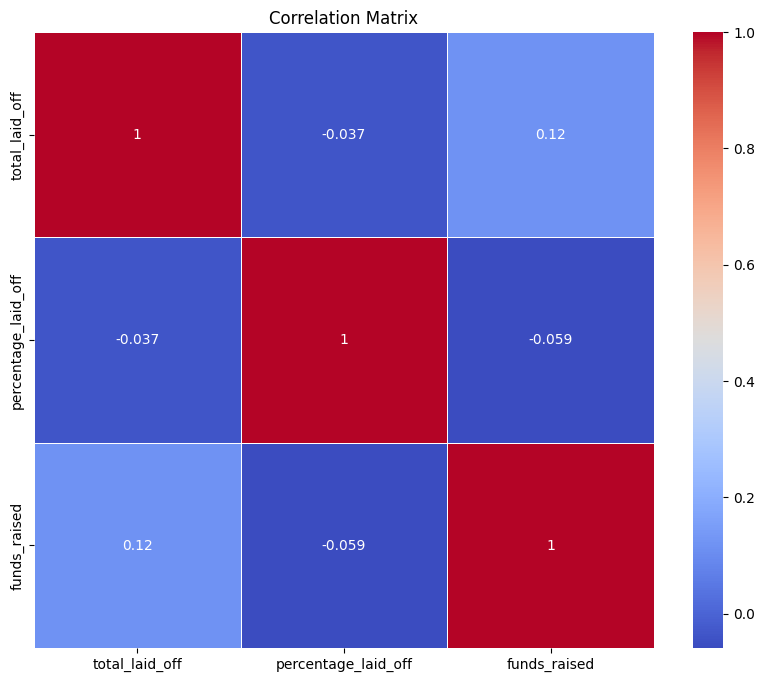

In [10]:
# Correlation matrix
correlation_matrix = layoffs_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

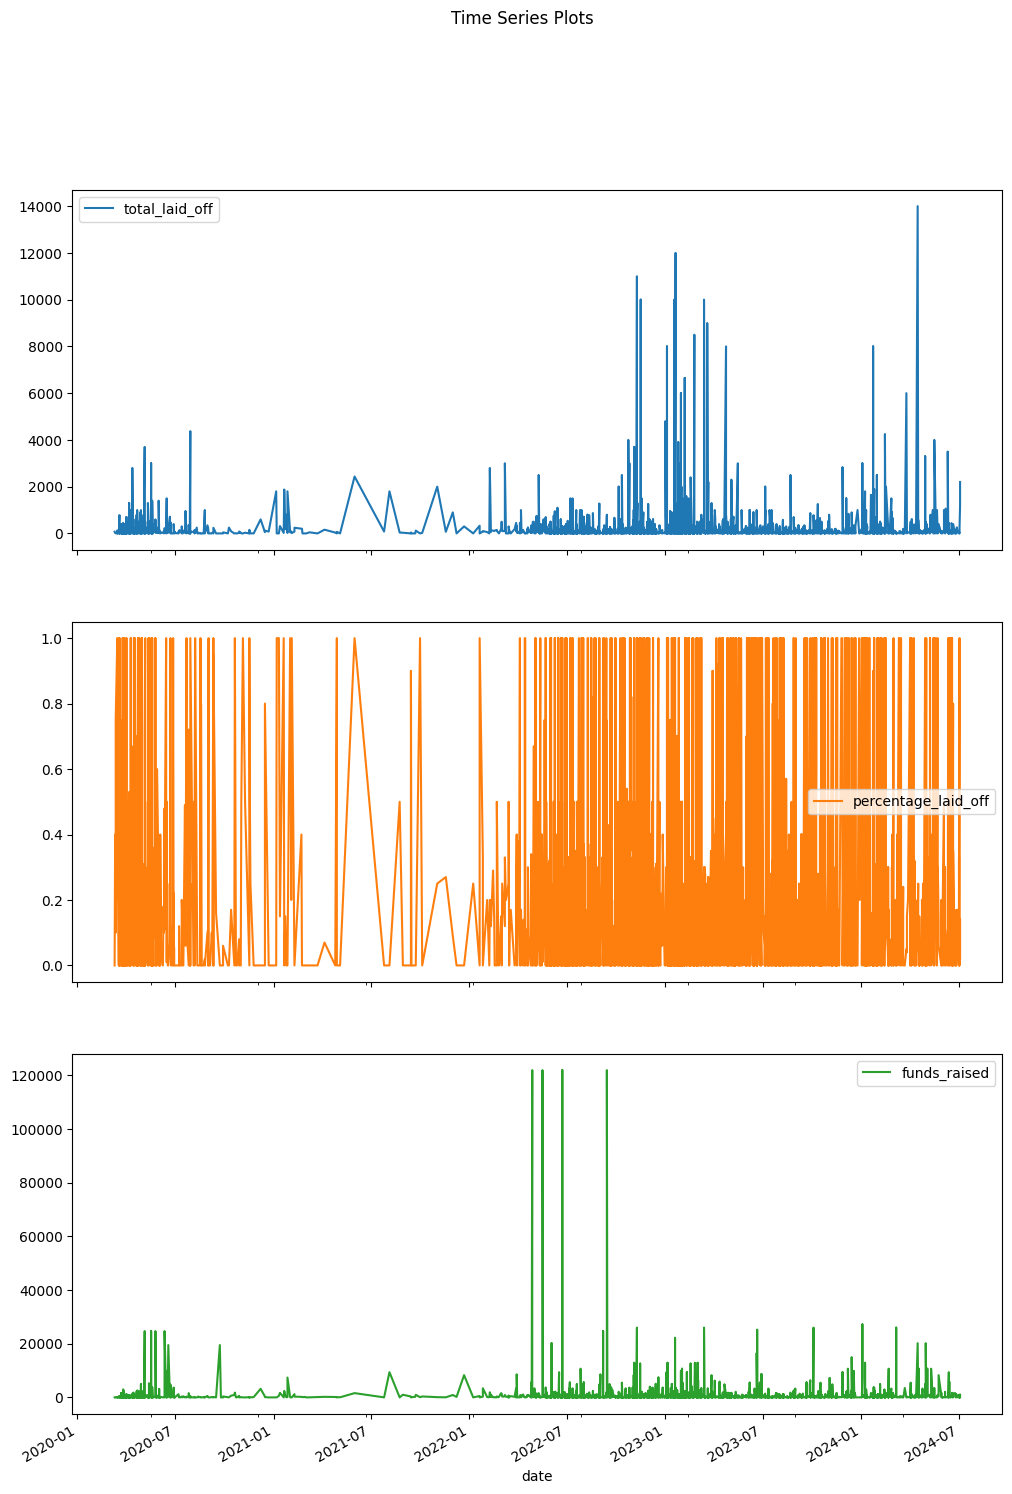

In [11]:
# Time series plot
layoffs_df.set_index('date', inplace=True)
layoffs_df[['total_laid_off', 'percentage_laid_off', 'funds_raised']].plot(figsize=(12, 18), subplots=True, layout=(3, 1), sharex=True)
plt.suptitle('Time Series Plots')
plt.show()

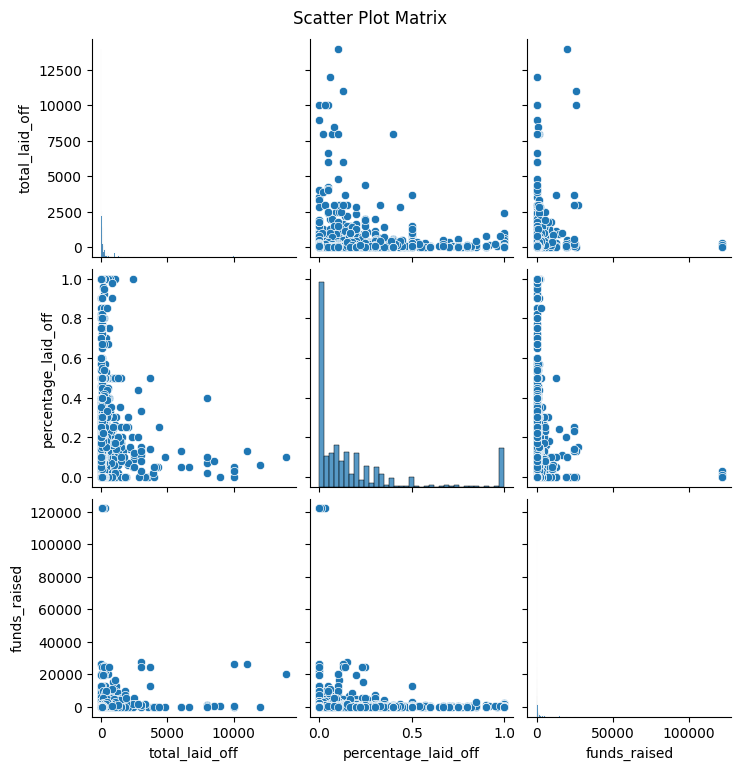

In [12]:
# Scatter plot matrix
sns.pairplot(layoffs_df[numerical_features].dropna())
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [13]:
# Categorical variables analysis
categorical_features = ['company', 'location', 'industry', 'stage', 'country']

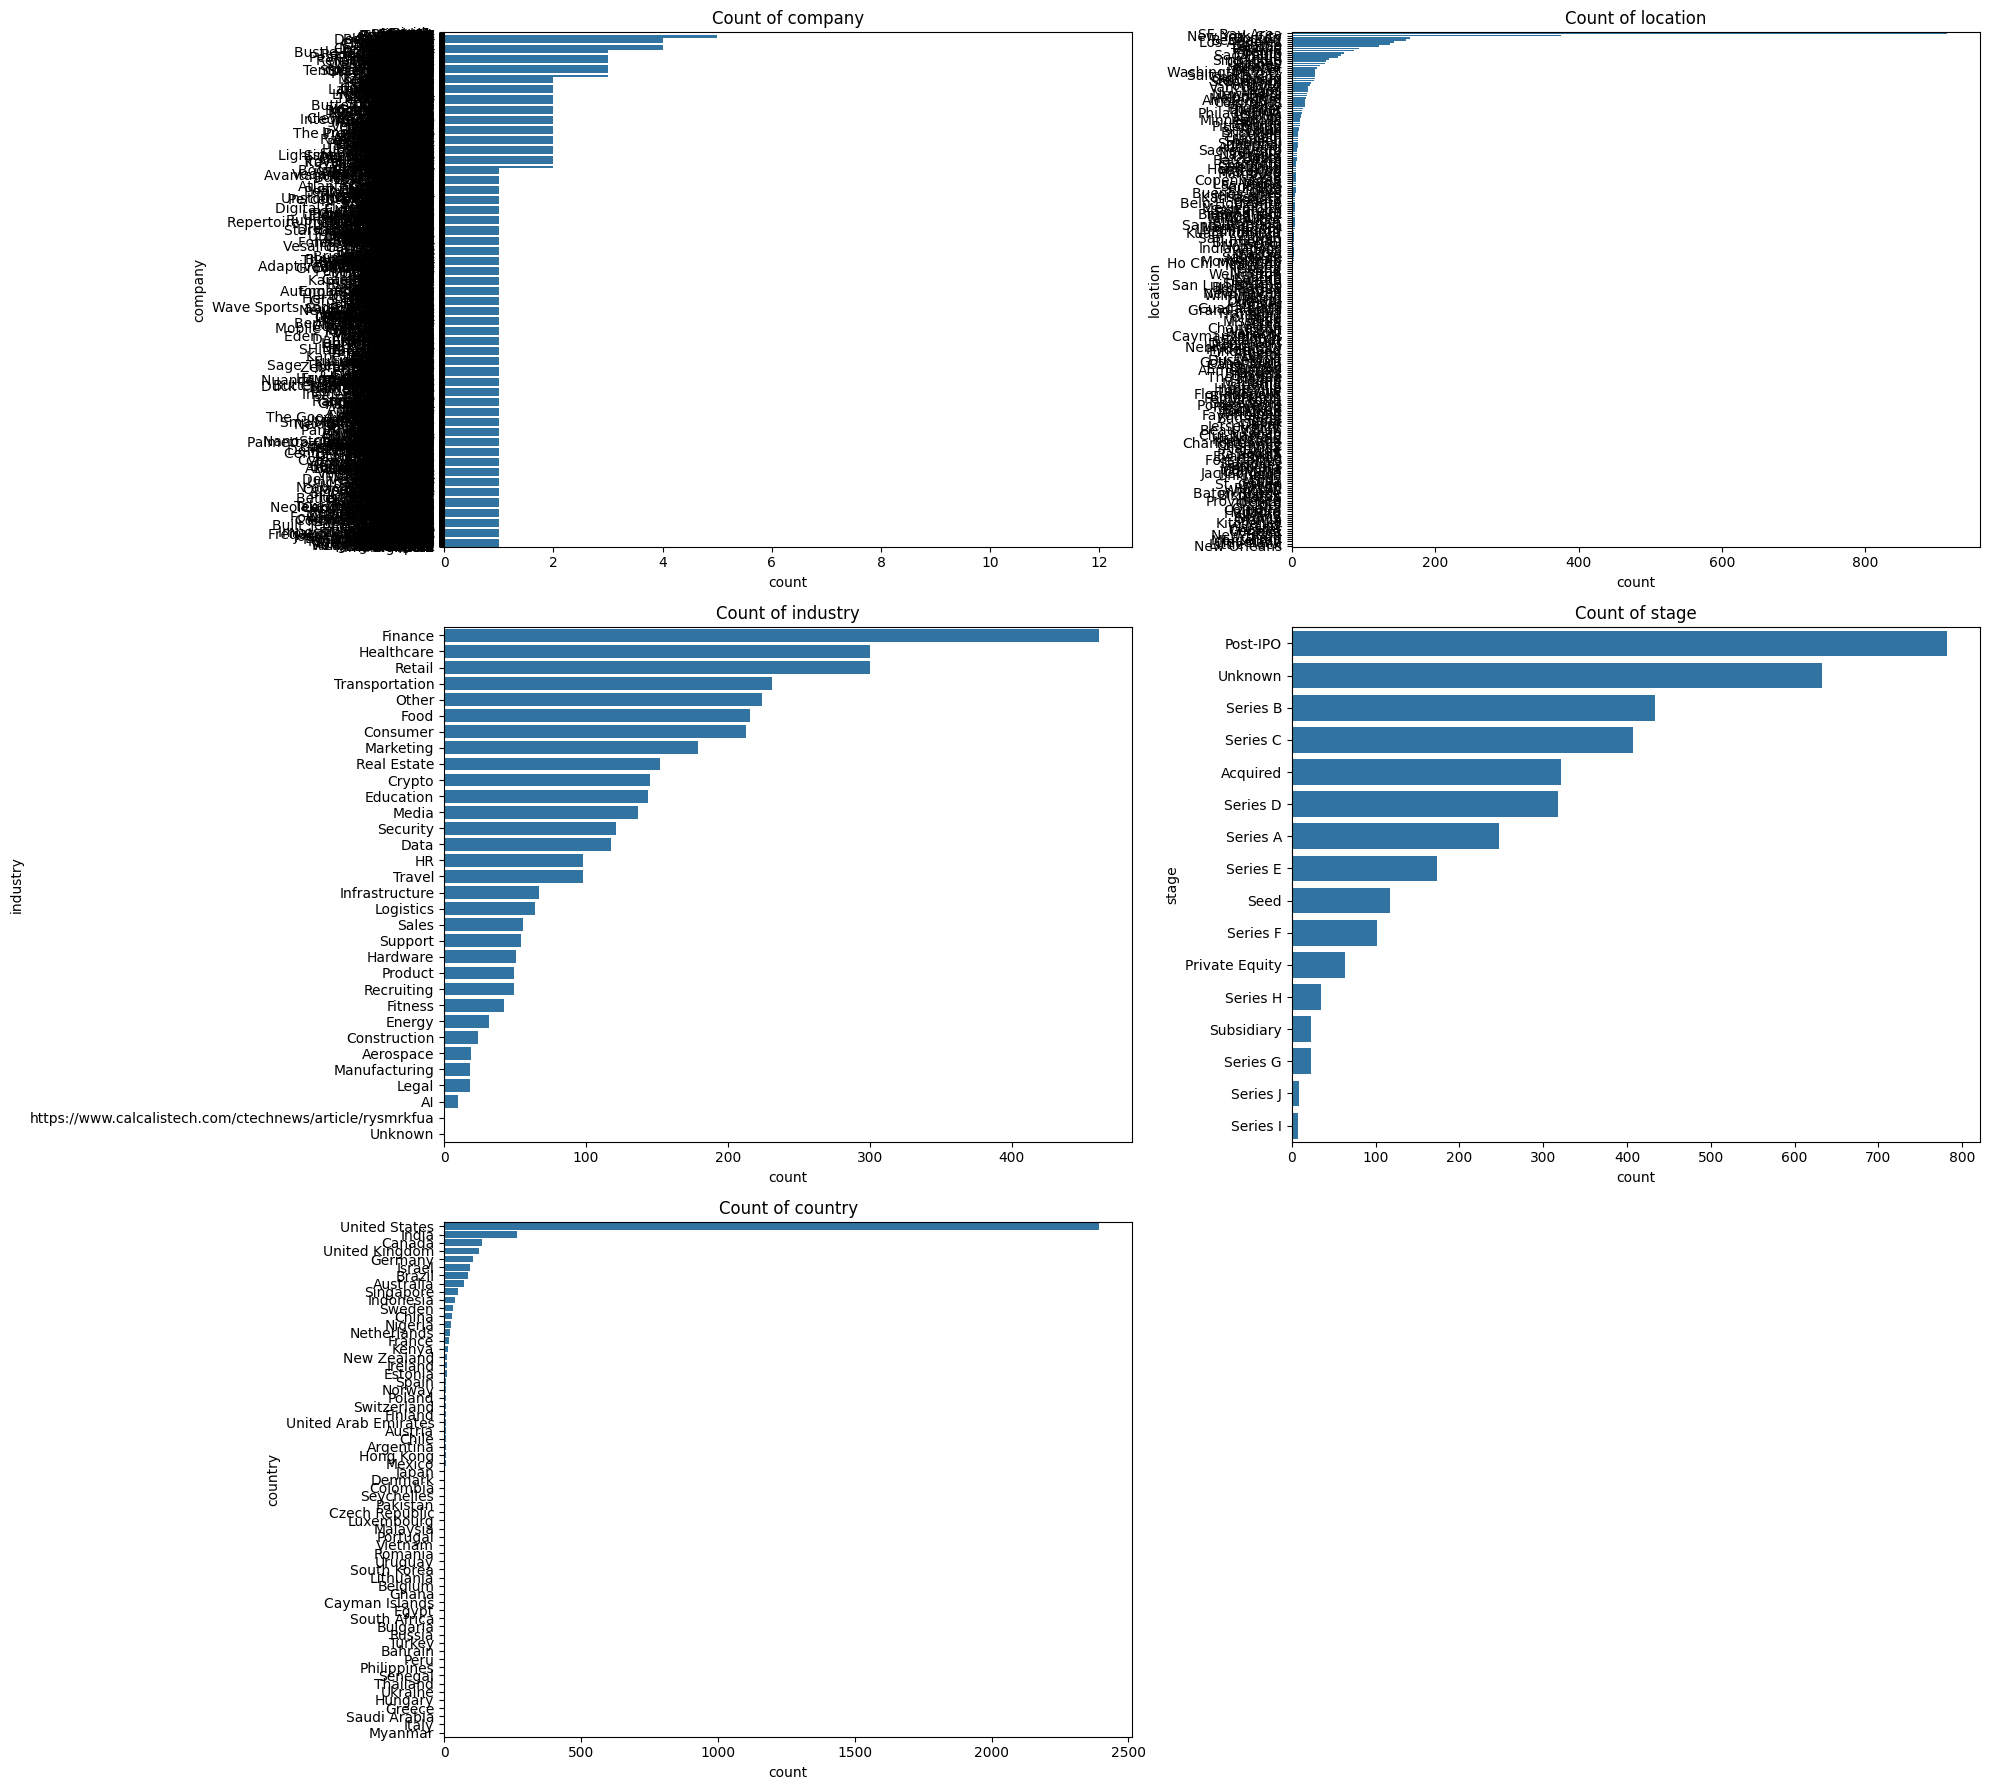

In [14]:
# Count plots for categorical variables
plt.figure(figsize=(20, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=feature, data=layoffs_df, order=layoffs_df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

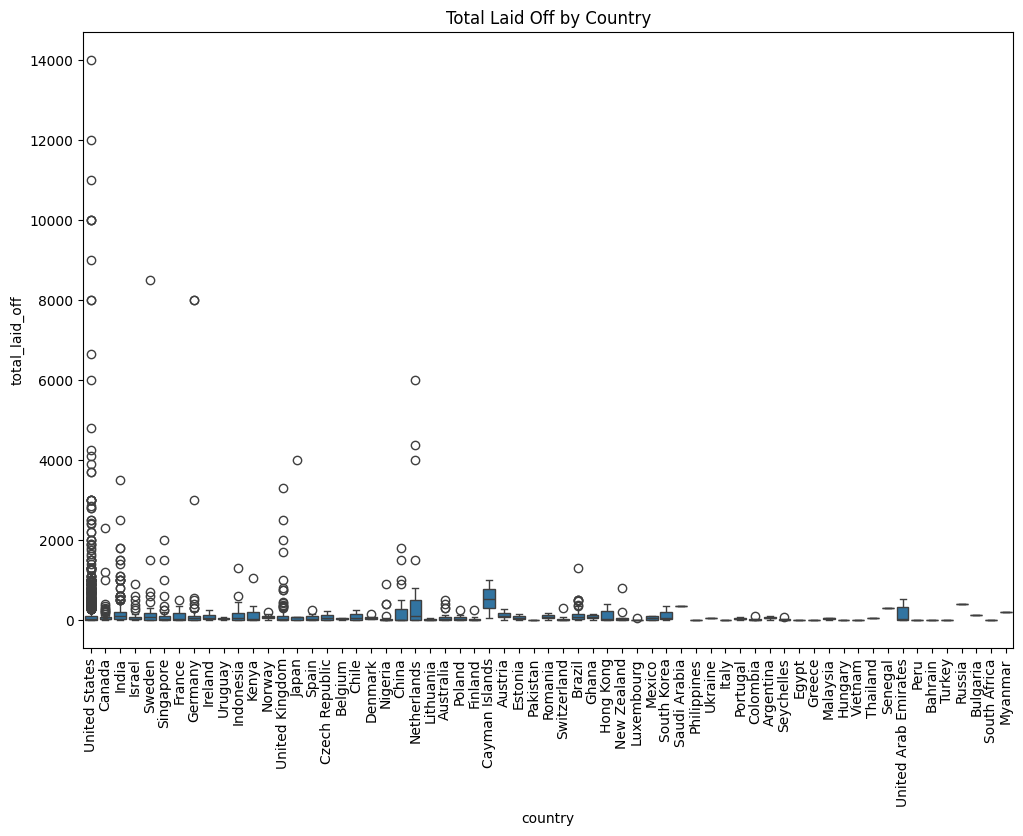

In [15]:
# Analyze layoffs by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='total_laid_off', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Total Laid Off by Country')
plt.show()

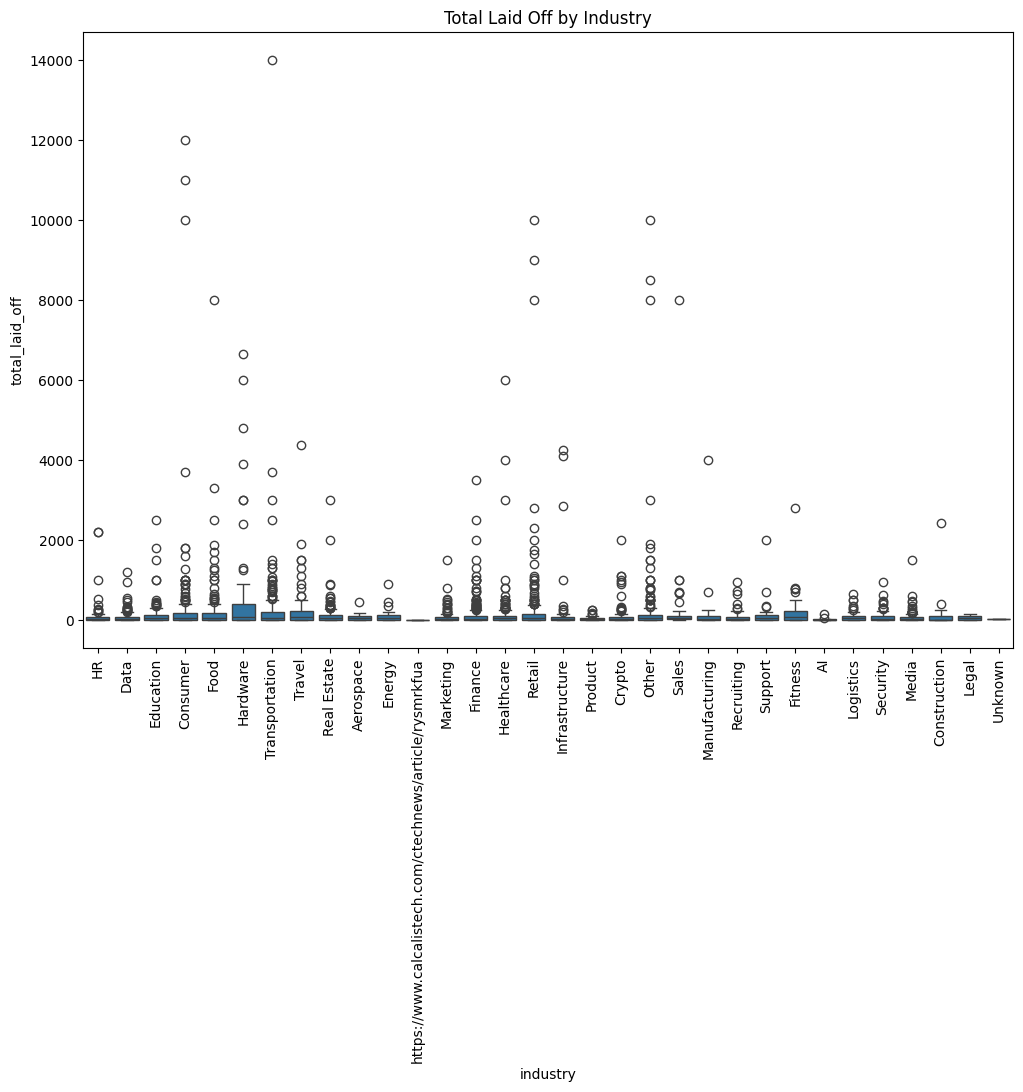

In [16]:
# Analyze layoffs by industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='total_laid_off', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Total Laid Off by Industry')
plt.show()

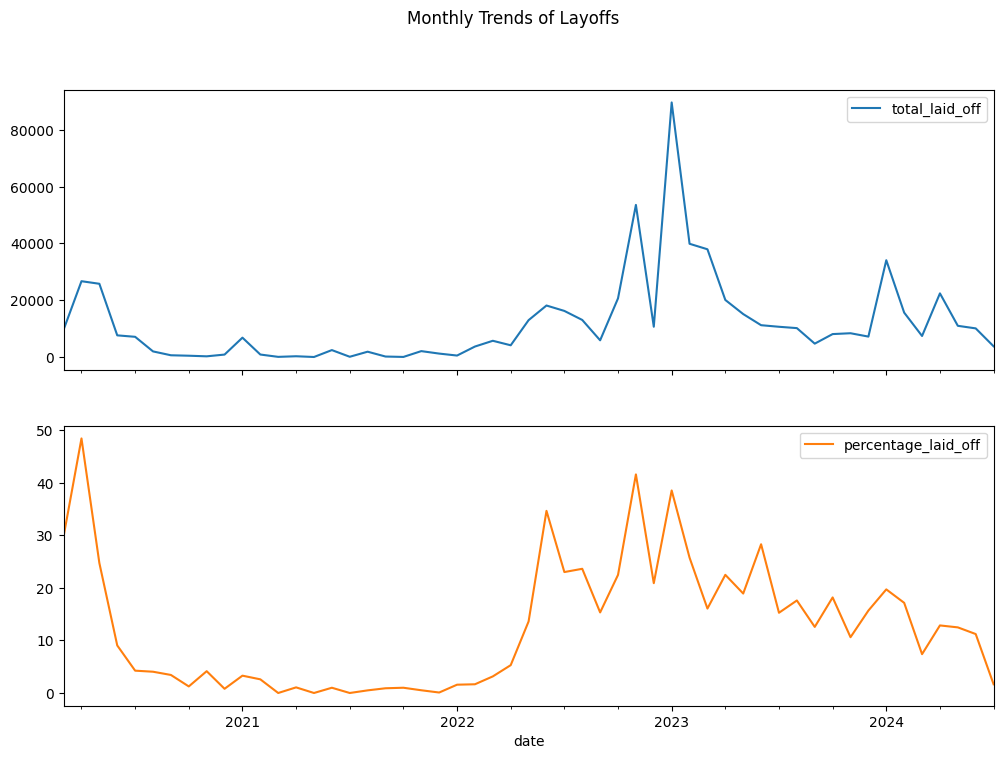

In [17]:
# Trend analysis over time
layoffs_df_monthly = layoffs_df.resample('M').sum()
layoffs_df_monthly[['total_laid_off', 'percentage_laid_off']].plot(figsize=(12, 8), subplots=True, layout=(2, 1), sharex=True)
plt.suptitle('Monthly Trends of Layoffs')
plt.show()

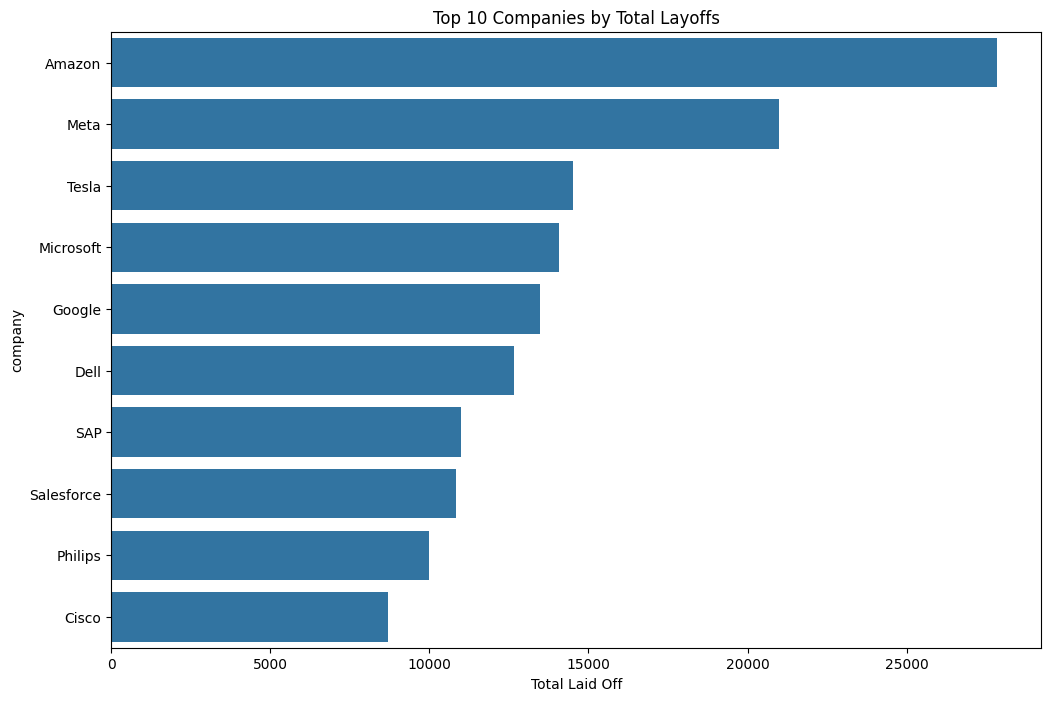

In [18]:
# Top companies by total layoffs
top_companies = layoffs_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Companies by Total Layoffs')
plt.xlabel('Total Laid Off')
plt.show()


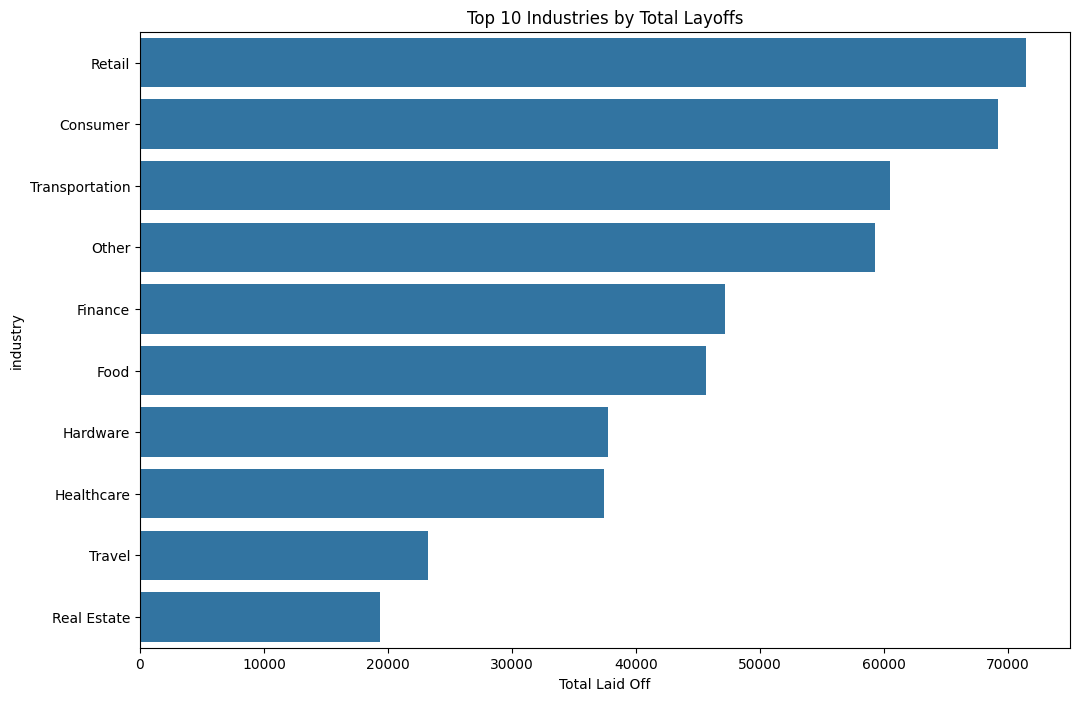

In [19]:
# Top industries by total layoffs
top_industries = layoffs_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Industries by Total Layoffs')
plt.xlabel('Total Laid Off')
plt.show()

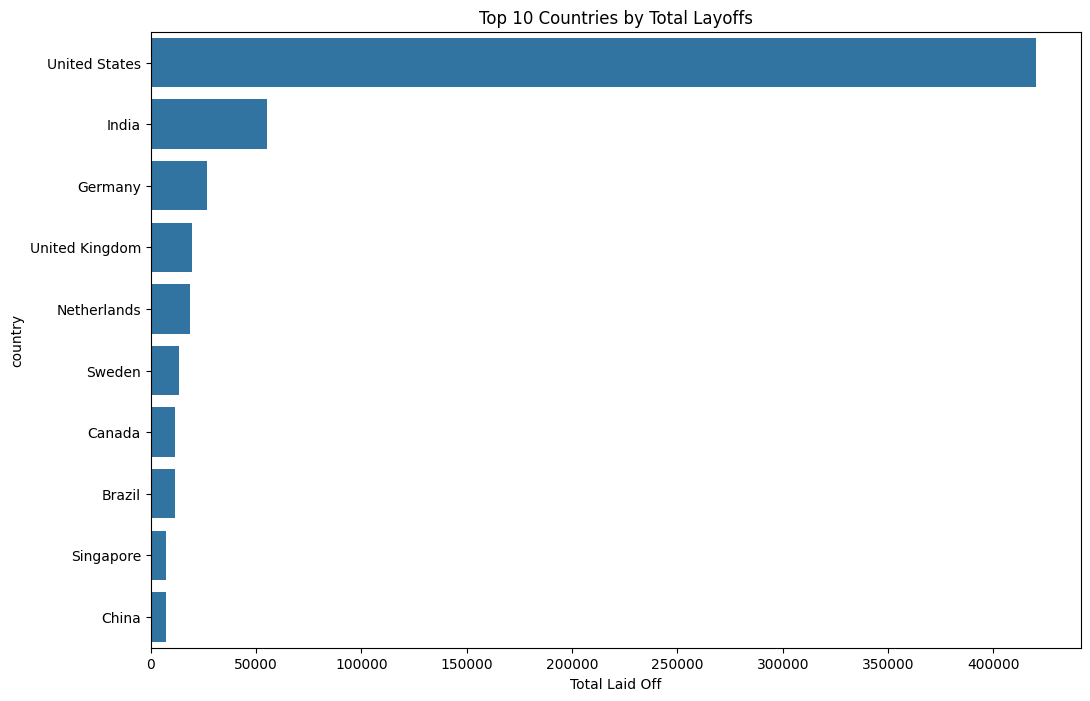

In [20]:
# Top countries by total layoffs
top_countries = layoffs_df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Total Layoffs')
plt.xlabel('Total Laid Off')
plt.show()

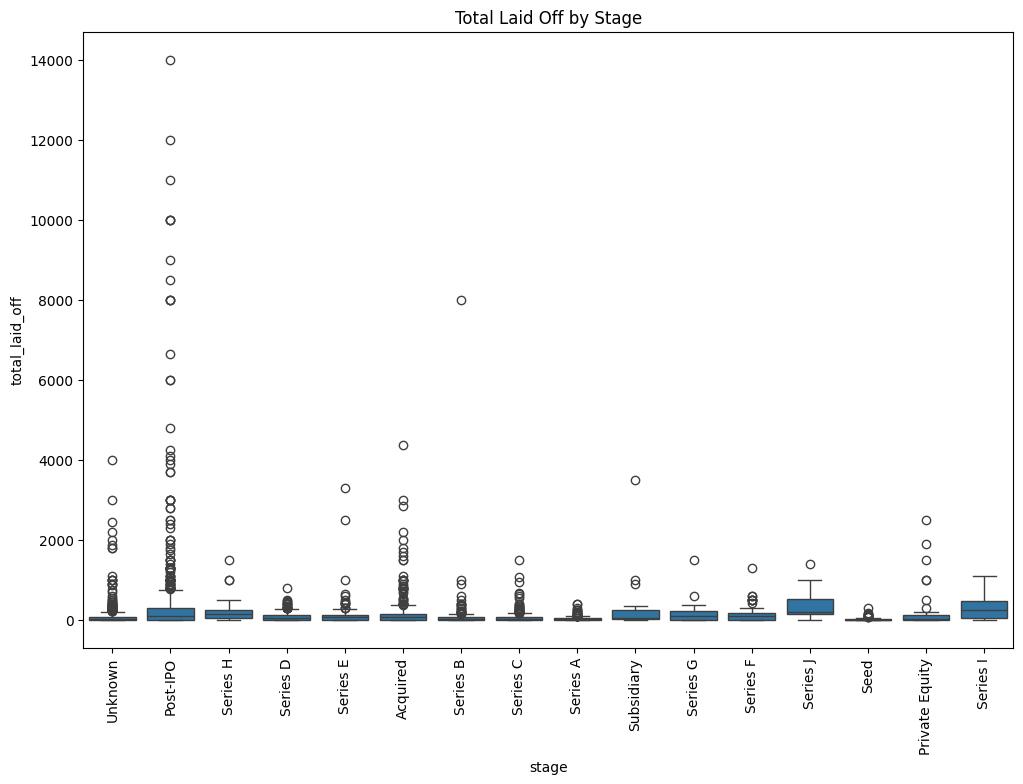

In [21]:
# Distribution of layoffs by stage
plt.figure(figsize=(12, 8))
sns.boxplot(x='stage', y='total_laid_off', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Total Laid Off by Stage')
plt.show()

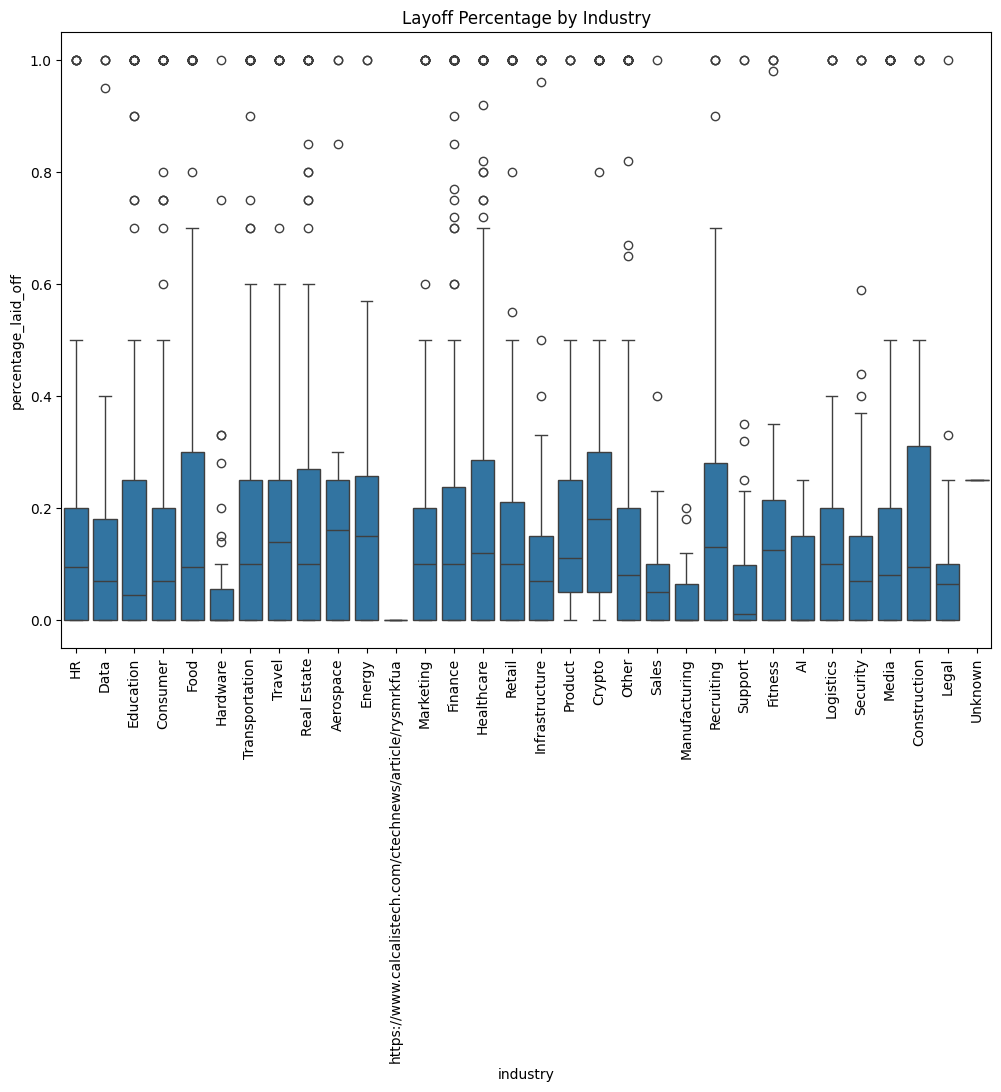

In [22]:
# Layoffs percentage by industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='percentage_laid_off', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Layoff Percentage by Industry')
plt.show()

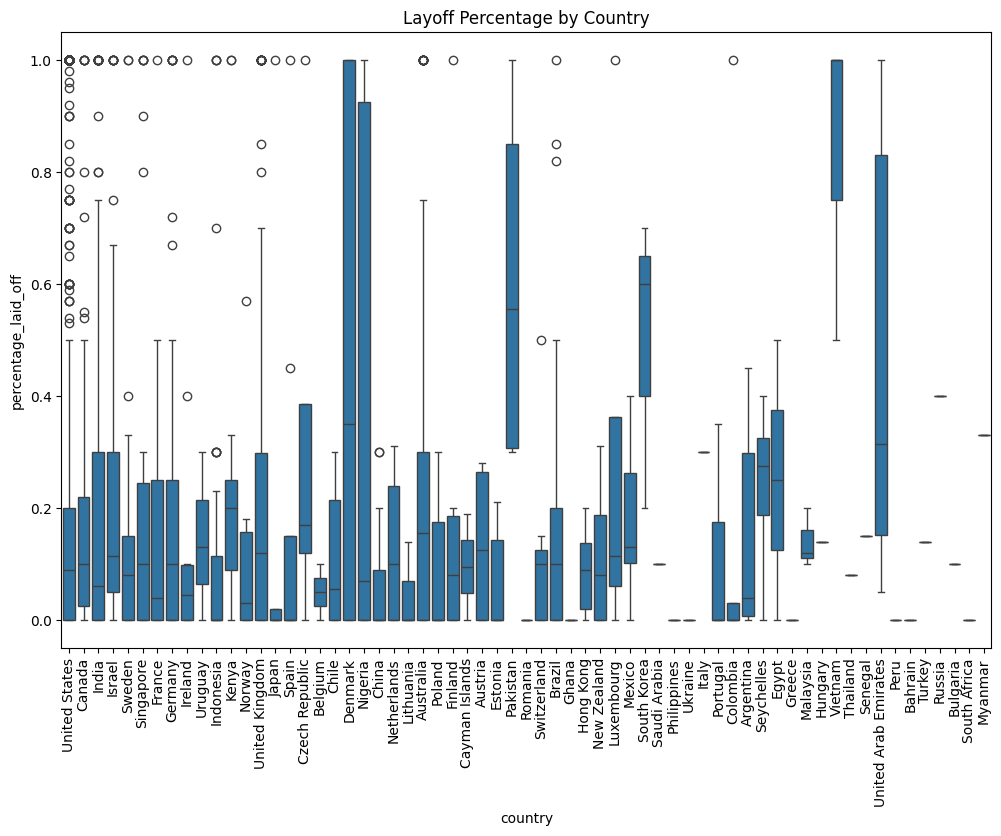

In [23]:
# Layoffs percentage by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='percentage_laid_off', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Layoff Percentage by Country')
plt.show()

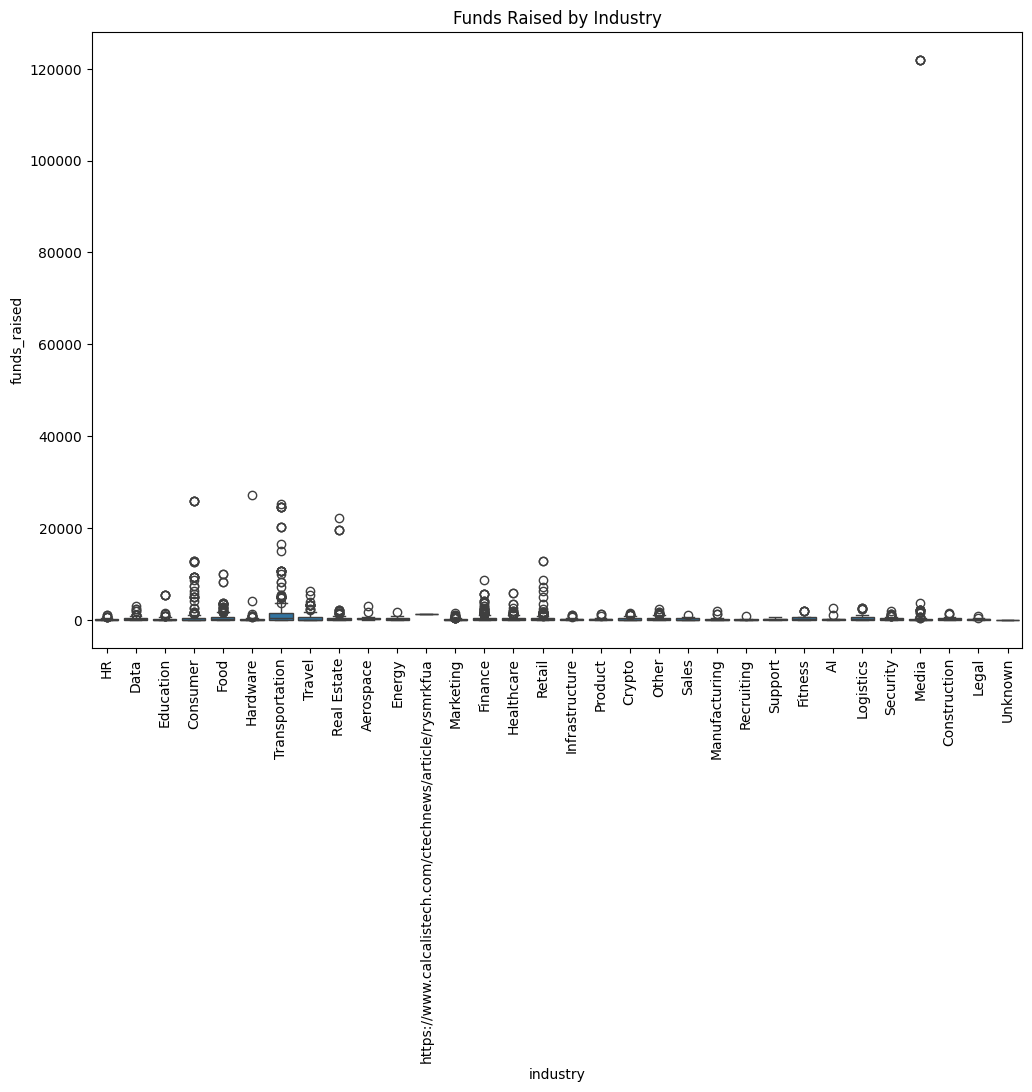

In [24]:
# Fundraising analysis by industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='funds_raised', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Funds Raised by Industry')
plt.show()

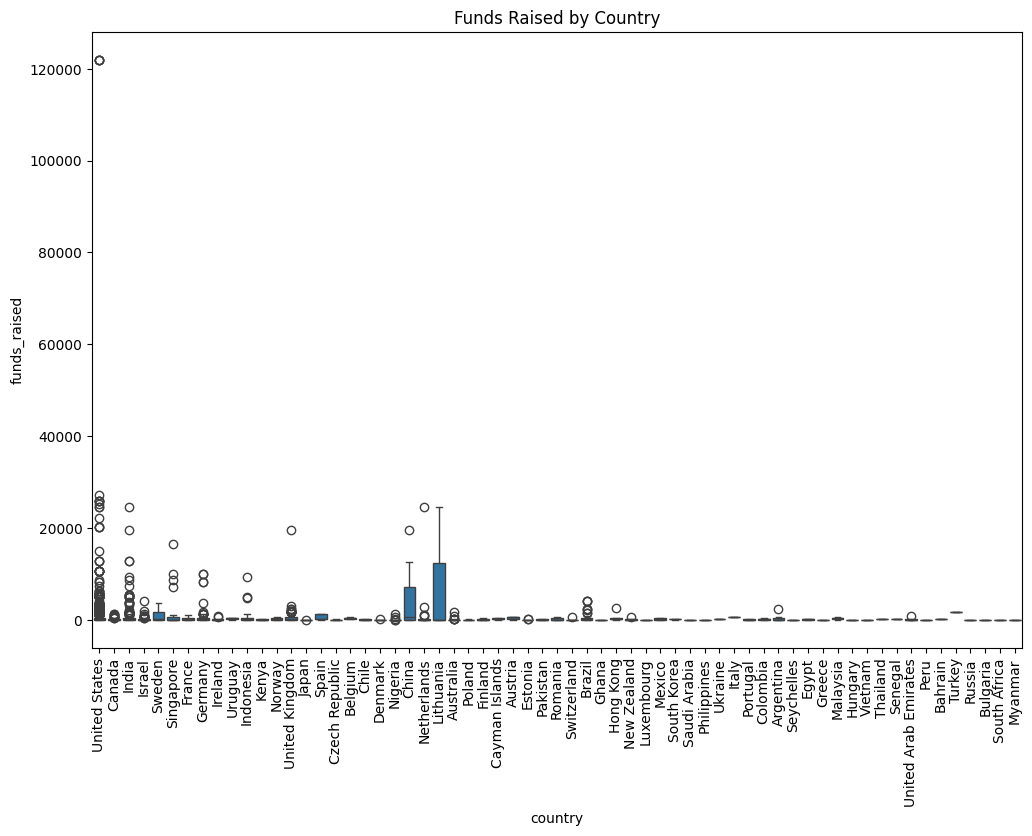

In [25]:
# Fundraising analysis by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='funds_raised', data=layoffs_df)
plt.xticks(rotation=90)
plt.title('Funds Raised by Country')
plt.show()

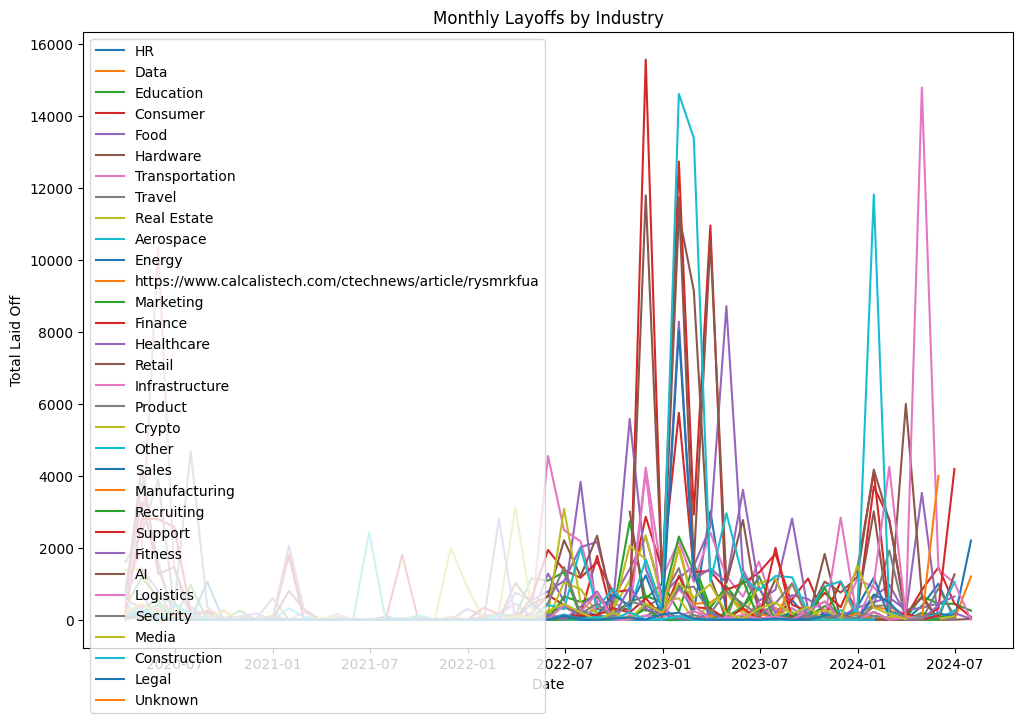

In [26]:
# Time series analysis of layoffs by industry
plt.figure(figsize=(12, 8))
for industry in layoffs_df['industry'].unique():
    industry_data = layoffs_df[layoffs_df['industry'] == industry].resample('M').sum()
    plt.plot(industry_data.index, industry_data['total_laid_off'], label=industry)
plt.legend()
plt.title('Monthly Layoffs by Industry')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.show()

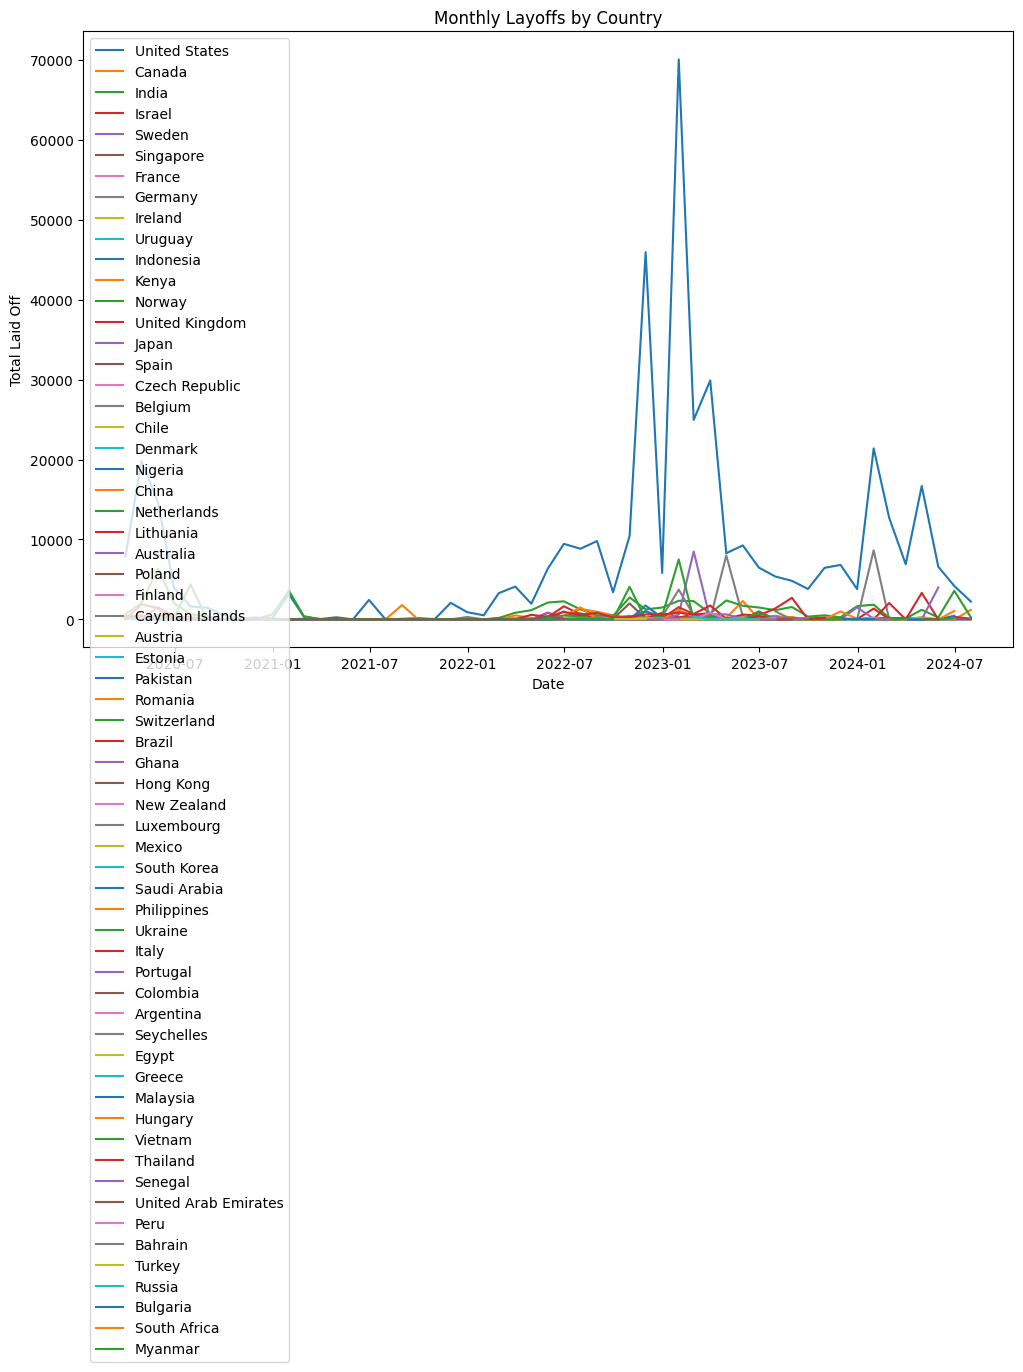

In [27]:
# Time series analysis of layoffs by country
plt.figure(figsize=(12, 8))
for country in layoffs_df['country'].unique():
    country_data = layoffs_df[layoffs_df['country'] == country].resample('M').sum()
    plt.plot(country_data.index, country_data['total_laid_off'], label=country)
plt.legend()
plt.title('Monthly Layoffs by Country')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.show()